<a href="https://colab.research.google.com/github/babakansari/DeepLearning/blob/master/RNN_for_autocomplete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recurrent Neural-network experiment for Auto Complete - Babak Ansari-Jaberi

https://www.youtube.com/watch?v=iMIWee_PXl8

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.model_selection import train_test_split

In [0]:
Data = [[[(i+j)/100] for i in range(5)] for j in range (100)]
Target = [(i+5)/100 for i in range(100)]


In [0]:
data = np.array(Data, dtype=float)
target = np.array(Target, dtype=float)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state = 4 )

In [0]:
model = Sequential()
model.add(LSTM((1), batch_input_shape=(None, 5, 1), return_sequences=True))
model.add(LSTM((1), return_sequences=False))
#model.add(Dense(1))
#model.add(Activation('softmax'))

In [0]:
#model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.01), metrics=['accuracy'])
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 5, 1)              12        
_________________________________________________________________
lstm_9 (LSTM)                (None, 1)                 12        
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(x_train, y_train, epochs = 100, validation_data=(x_test, y_test))

Train on 80 samples, validate on 20 samples
Epoch 1/400
80/80 [==============================] - 1s 17ms/step - loss: 0.4851 - acc: 0.0000e+00 - val_loss: 0.3834 - val_acc: 0.0000e+00
Epoch 2/400
80/80 [==============================] - 0s 400us/step - loss: 0.4812 - acc: 0.0000e+00 - val_loss: 0.3796 - val_acc: 0.0000e+00
Epoch 3/400
80/80 [==============================] - 0s 318us/step - loss: 0.4774 - acc: 0.0000e+00 - val_loss: 0.3758 - val_acc: 0.0000e+00
Epoch 4/400
80/80 [==============================] - 0s 297us/step - loss: 0.4735 - acc: 0.0000e+00 - val_loss: 0.3719 - val_acc: 0.0000e+00
Epoch 5/400
80/80 [==============================] - 0s 319us/step - loss: 0.4696 - acc: 0.0000e+00 - val_loss: 0.3680 - val_acc: 0.0000e+00
Epoch 6/400
80/80 [==============================] - 0s 302us/step - loss: 0.4656 - acc: 0.0000e+00 - val_loss: 0.3641 - val_acc: 0.0000e+00
Epoch 7/400
80/80 [==============================] - 0s 394us/step - loss: 0.4616 - acc: 0.0000e+00 - val_loss:

In [0]:
results = model.predict(x_test)

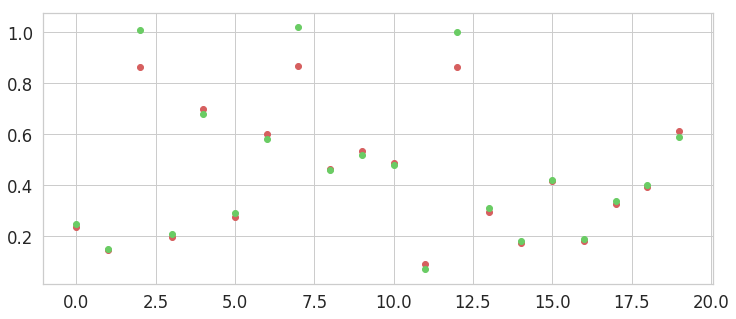

In [0]:
plt.scatter(range(20), results, c= 'r')
plt.scatter(range(20), y_test, c= 'g')
plt.show()

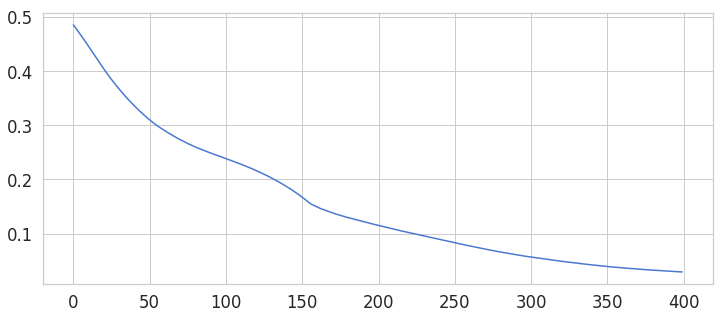

In [0]:
plt.plot(history.history['loss'])
plt.show()